<a href="https://colab.research.google.com/github/tctamedie/EventManagement/blob/master/FraudDetectionCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
fraudTest = pd.read_csv('fraudTest.csv')
fraudTrain = pd.read_csv('fraudTrain.csv')

In [12]:
data= pd.concat([fraudTrain, fraudTest], ignore_index=True)

In [13]:
data['fraudulent'] = data['is_fraud'].map({0:'No', 1:'Yes'})

In [14]:
data.describe(include='object').transpose()

,count,unique,top,freq
trans_date_trans_time,1852394,1819551,2020-12-17 20:36:39,4
merchant,1852394,693,fraud_Kilback LLC,6262
category,1852394,14,gas_transport,188029
first,1852394,355,Christopher,38112
last,1852394,486,Smith,40940
gender,1852394,2,F,1014749
street,1852394,999,908 Brooks Brook,4392
city,1852394,906,Birmingham,8040
state,1852394,51,TX,135269
job,1852394,497,Film/video editor,13898


In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01


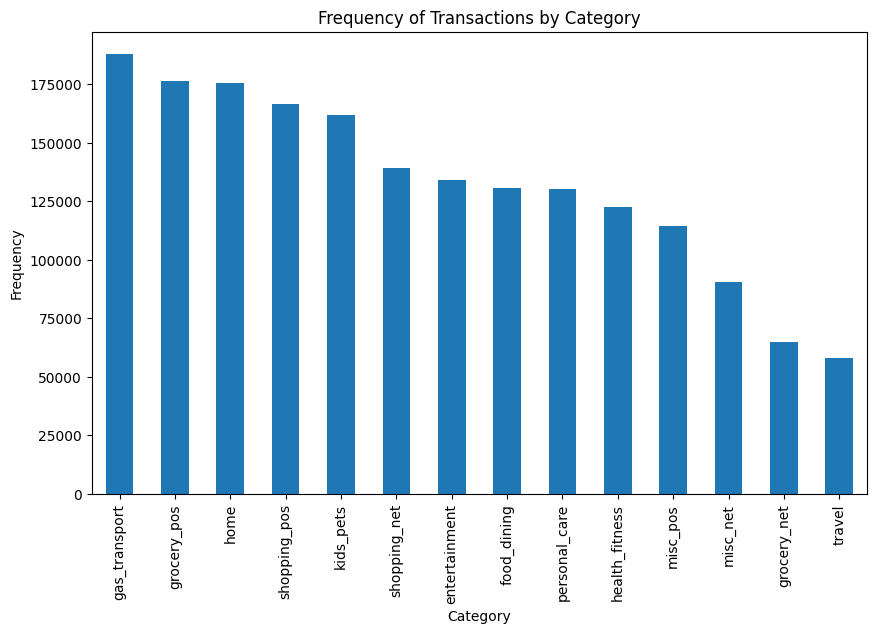

In [18]:
data['category'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

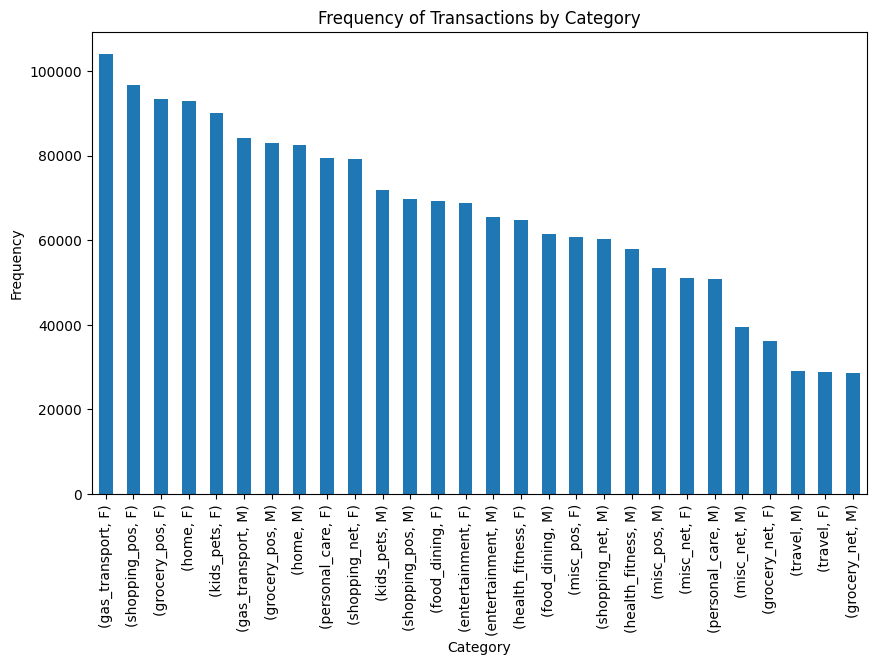

In [20]:
data[['category','gender']].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [26]:
# bar charts for categorical data
def pivotToBarChart(data, indexBy, aggregateBy, values, title, xlabel,
                    ylabel,aggfunc='count', anchor=(1.04, 1),
                    anchor_location='upper left', figsize=(10,4),
                    fill_value=0, stacked=False, show_proportions=False):
    pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)
    row_pivot = pivot_df
    if show_proportions == True:
        pivot_df = pivot_df.div(pivot_df.sum(1).astype(float), axis=0)
    pivot_df.plot(kind='bar',figsize=(10,6), stacked=stacked)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=anchor, loc=anchor_location)
    plt.show()
    return row_pivot

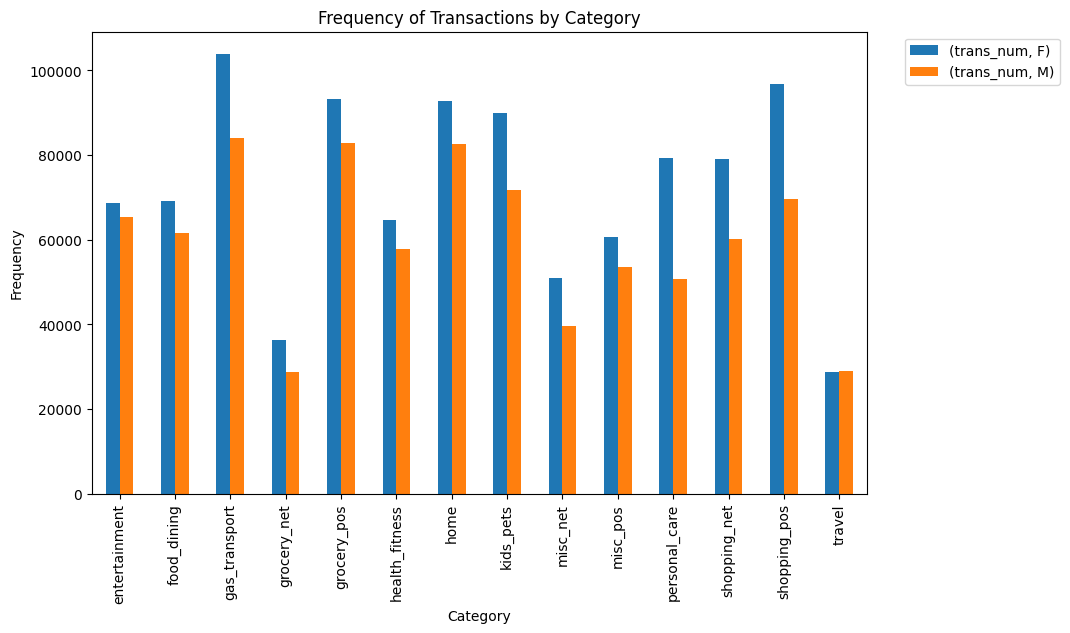

In [27]:
###############################################################
#       Relationship between gender, hypertension, and age    #
###############################################################
pivot_df = pivotToBarChart(data=data,indexBy=['category'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Category',
                           ylabel='Frequency',
                           title='Frequency of Transactions by Category')

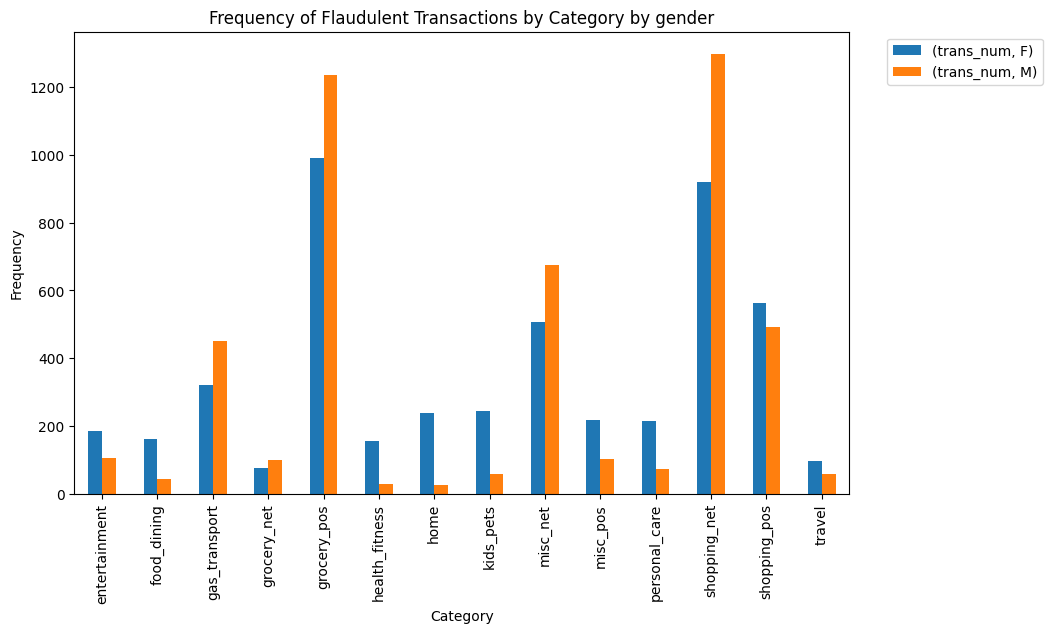

In [31]:
###############################################################
#       Relationship between gender, hypertension, and age    #
###############################################################
_data=data[data['is_fraud']==1]
pivot_df = pivotToBarChart(data=_data,indexBy=['category'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Category',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Category by gender')